In [209]:
from mesa import Model, Agent
from mesa.time import RandomActivation, StagedActivation
from mesa.space import HexGrid, accept_tuple_argument
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors, path
from matplotlib.collections import RegularPolyCollection, transforms, PolyCollection
from matplotlib.markers import MarkerStyle
import numpy as np
import itertools

#import village_life as vl

%matplotlib inline
from collections import namedtuple, Counter

from scipy import stats

import json

(array([ 33.,  49., 107., 133., 157., 191., 139., 100.,  64.,  27.]),
 array([0.02189519, 0.1175634 , 0.21323161, 0.30889981, 0.40456802,
        0.50023623, 0.59590444, 0.69157265, 0.78724086, 0.88290907,
        0.97857727]),
 <a list of 10 Patch objects>)

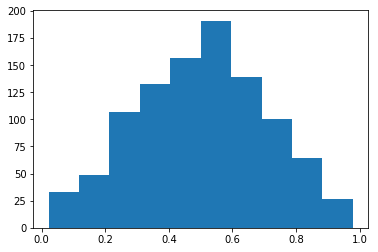

In [238]:
rvs = stats.triang.rvs(0.5, size=1000)
plt.hist(rvs)

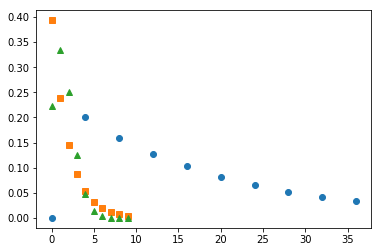

In [220]:
#rvs  = stats.geom.rvs(0.5, size=1000)
x = np.arange(0, 10)
pmf = stats.geom.pmf(x, 0.2)
pmf2 = stats.planck.pmf(x, 0.5)
pmf3 = stats.poisson.pmf(x, 1.5)
#plt.hist(rvs, density=True)
plt.plot(x, pmf, 'o')
plt.plot(x, pmf2, 's')
plt.plot(x, pmf3, '^')

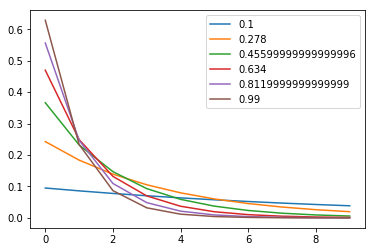

In [273]:
r = 1
p = 1
r_eff = np.linspace(0.1, 0.99, 6)
hunger_level = 1- (r-r_eff)**p/r
#plt.plot(r_eff, hunger_level)

n = np.arange(0, 10)
for rl in r_eff:
    plt.plot(n, stats.planck.pmf(n, rl), label=str(rl))
    
plt.legend()


C:\Users\Stefan Boltzmann\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


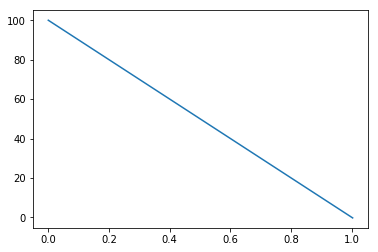

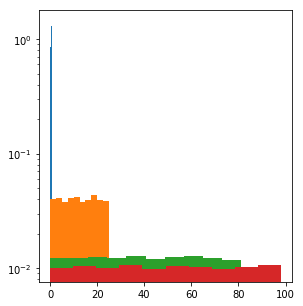

In [272]:
r = 100
N = 200
F = np.arange(0, (N+1)*r, r/2)

reff = F/N
dr = r-reff
hunger = (dr/r)**1

plt.plot(F/r/N, hunger*able2leave)

able2leave = 100

thr = 1-(np.random.rand(10000))**1
plt.figure(figsize=(10, 5))
for hungerlevel in [ 0.1, 0.5, 0.9, 0.99]:

    leaving = thr[thr<hungerlevel**2]* able2leave
    staying = thr[thr>=hungerlevel**2]* able2leave
    #plt.hist(thr)
    plt.subplot(121)
    plt.hist(leaving, density=True)
    #plt.subplot(122)
    #plt.hist(staying, density=True)
plt.yscale('log')

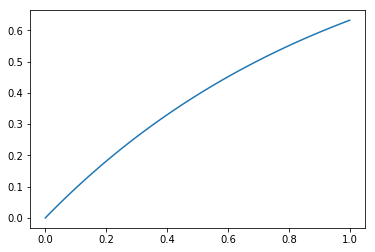

In [263]:
x = np.linspace(0, 1, 101)
y = 1-1/np.exp(x)
plt.plot(x, y)

# Model

## Aim
Survival of total population

Population dies if not enough food


## Structure
- Hexgrid with assigned resources, fertility of land, etc
- Communities of survivora

### Communities
#### Properties
-  population
-  food
-  facilities

Optional
-  Health, e.g drops with every $\Delta t$ in starvation

#### Actions
-  generate food
    -  scavenging: some amount of food appears out of nothing; once we have a hex resource for that we could couple it to increase the chances
    -  growing: needs a facility and workers on it; a farm generates a fixed amount of food, scaled by the fertility of the land
-  build: 
    -  if enough non-working people are in the community they can be assigned to operate new a facility
    -  should have cooldown: a new facility can only be generated every n-th time step
-  feed: 
    -  change the amount of food according to the current population
        
            foodstock = foodstock - r* n_c, r is ration per person
            if foodstock < 0:
                foodstock = 0 , maybe =-1 so you can differentiate between all people just fed and starvaing without need to check starvation level as well
                effective ration r_eff = foodstock/n_c
                starvation = 1 - (r-r_eff)** p / r 
            
-  survive:
    -  check if every person was fed

### Interactions
-  Migration
    -  if foodstock is too small/level of starvation is high, people leave
    -  Options for leaving rules
        -  number of people leaving scales with starvation
        -  workers can not leave
        -  destination
            -  random community
            -  random neigboring community
    



## some numbers
-  1 $\Delta t  = $ 1 week
-  1 person eats 1 food
-  1 farm needs 10 workers
-  1 farm generates 10 food * fertility * something random, maybe triangle
-  1 facility every 4 $\Delta t$


# $\Delta r$ does not work, can get negative

In [ ]:
key_map = [('food', 'farm', 'farmland')]

In [365]:
farm = Farm(a)
c = Counter()
c.update([BaseFacility])
c.update([farm, farm])
for e in c.elements():
    print(e)
    
print(c.get(farm))

<class '__main__.BaseFacility'>
2


#### Agent - Grid - Facility coordination

-  assign agent to facility 
    -  then f knows its location via agent and could claim hexfield properties from there
    -  resource modifiers can be set once
-  assign hexfield properties to agent
    -  pass to f.operate() every time

In [384]:
a = Community(0, model)
a.__setattr__('pos', (0,0))
b = BaseFacility('bla', a)
f = Farm(a)

In [388]:
Farm.__name__

'Farm'

In [393]:
c = Counter()
c.update([b, f, f])
[o.name for o in c.keys()]
c.get(b)

1

In [516]:
a.model.grid.get_prop((0.0), 'farmland')

TypeError: 'float' object is not iterable

In [16]:
a = model.schedule.agents[0]
f = Farm(a)

['farmland']
Set modifier for  ['farmland']
<class '__main__.cell_content'>
{'name': 'farm', 'agent': <__main__.Community object at 0x000001509E525BE0>, 'pos': (2, 9), 'operators': 10, 'resources': ['farmland'], 'product': 'food', 'product_rate': 10, 'resource_modifiers': {'farmland': 71.92624526882679}, 'resource_modifier': {}} ['farmland']


In [351]:
l = list('farmland')
np.random.choice(l)

'a'

In [390]:
class FacilityCounter(dict):
    def __init__(self):
        super().__init__()

        
    def add_facility(self, facility):
        '''Increases count by one if facility is present in keys, 
        else adds new tuple(facility-instande, 1) '''
        # Check if object type is already in keys
        if facility.name in self.keys():
            self[facility.name][1] += 1
        else: 
            self[facility.name] = [facility, 1]
            
    def remove_facility(self, facility='Random'):
        if facility == 'Random':
            facility = np.random.choice(list(self.keys()))
            self[facility][1] -= 1
        elif facility.name in self.keys():
            self[facility.name][1] -= 1
            facility = facility.name
        else:
            raise RuntimeError('Cannot remove facility.')
        print('Facility {} removed, {:d} left'.format(facility, self[facility][1]))
        return self[facility][0]

In [391]:
class BaseFacility():
    '''Template for a facility class
    
    Is it useful to add the agent that owns the facility? Might facilitate interactions with the map. Is added for now
    
    Write setting functions so you can load specs from dict/file
    '''
    def __init__(self, name, agent):
        self.name = name
        self.agent = agent
        self.pos = agent.pos
        #self.cooldown = 0
        self.operators = 0
        self.resources = []
        self.product = None
        self.product_rate = 0
        self.resource_modifiers = dict()
        #self.set_resource_modifiers()
    
    def operate(self):
        return self.product_rate
    
    def set_resource_modifiers(self):
        '''Set resources from grid properties, depending on location'''
        #print('Set modifier for ', self.resources)
        self.resource_modifier = dict()
        for resource in self.resources:
            #print(resource, end=', ')
            prop = self.agent.model.grid.get_prop(self.pos, resource)
            self.resource_modifiers[resource] = prop
        #print('\n')
        
class Farm(BaseFacility):
    def __init__(self, agent, operators=10, resources=['farmland'], product='food'):
        super().__init__('farm', agent)
        #self.cooldown = cooldown
        #print(resources)
        self.operators = operators
        self.resources = resources
        self.product = product
        self.product_rate = 10
        self.set_resource_modifiers()
        #print(self.__dict__, resources)
        
    def operate(self):
        p = self.product_rate * self.resource_modifiers['farmland'] * np.random.triangular(0, 0.5, 1)
        if p < 0:
            raise RuntimeError('product < 0, {:.4f}'.format(self.resource_modifiers['farmland']) )
        else:
            return p

    
    
    
class Community(Agent):
    def __init__(self, id, model, build_cooldown=4):
        super().__init__(id, model)
        self.food = 0
        self.population = np.random.randint(5, 100)
        self.facilities = FacilityCounter()
        self.time2build = 0  # Tracker for cooldown
        self.FOODRATION = 1
        self.BUILDCOOLDOWN = build_cooldown
        self.workers = 0
        self.hunger = 0
        
        
    def generate_food(self):
        self.food += self.scavenge('food', r=self.FOODRATION)
        #mod = get hex property
        #print(self.facilities.get('farm'))
        if self.facilities.get('farm') is not None:
            farm, N = self.facilities['farm']
            for f in range(N):
                self.food += farm.operate()
        if self.food<0:
            raise RuntimeError('Food < 0')

    
    def feed(self):
        if self.population == 0: return
        reff = self.food/self.population  # Effective ration
        tmp = [reff, self.food, self.population]
        if reff >= self.FOODRATION:
            self.food -= self.population*self.FOODRATION
            self.hunger = 0
        elif reff < self.FOODRATION:
            self.food = 0
            self.hunger = (self.FOODRATION-reff)/self.FOODRATION
        
        if self.hunger < 0 or self.hunger > 1:
            raise RuntimeError('H={:.2f}, P={:.2f}, F={:.2f}, R={:.2f}, TMP={:.2f}, {:.2f}, {:.2f}'.format(
                self.hunger, self.population, self.food, reff, *tmp))
        '''   
        self.food -= self.population*self.FOODRATION
        if self.food <= 0:
            self.hunger = (self.FOODRATION-reff)/self.FOODRATION
            self.food = 0
        if self.hunger < 0:
            self.hunger=0
        #self.hunger = (self.FOODRATION-reff)/self.FOODRATION
        #if self.hunger <= 0:
        #    self.food -= self.population*self.FOODRATION
        #else:
        #   self.food = 0
        '''
    
    def operate_facility(self, facility):
        product = facility.operate()
    
    
    def build_facility(self):
        # Check cooldown
        if self.time2build > 0:
            self.time2build -= 1
        else:  # if building is possible
            self.time2build = self.BUILDCOOLDOWN  # Reset cooldown
            
            ## Check available workers
            newfacility = self.decide_facility() # Returns only farm fpr now
            #print(newfacility.name)
            self.facilities.add_facility(newfacility)
            self.workers += newfacility.operators
            
            
    
    def decide_facility(self):
        return Farm(self)
    
    
    def survive(self):
        if self.population <= 0:
            self._null_population()
        elif self.food/self.population < self.FOODRATION:
            dead = np.random.randint(0, int(self.population*self.hunger)+1)
            print('Dead:', dead)
            #print(self.population, self.hunger, int(self.population*self.hunger))
            self.population -= dead
            self._null_population()
        #if self.population < self.workers:
        while self.population < self.workers:
            facility = self.facilities.remove_facility(facility='Random')
            self.workers -= facility.operators
        
    
    
    def migrate(self):
        '''Depending on hunger level people leave the community
        This func needs more elaboration
        '''
        able2leave = self.population-self.workers
        rv = np.random.rand()
        if rv < self.hunger:
            other_agent = self.random.choice(self.model.schedule.agents)
            leave_N = int(rv * able2leave)
            print('Leaving:', leave_N, end=', ')
            other_agent.population += leave_N
            self.population -= leave_N
            self._null_population()
        
    
    def scavenge(self, resource, r=1):
        '''
        some amount of resource appears 
        out of nothing; once we have a hex resource for that 
        we could couple it to increase the chances
        
        Todo
        -----
        - get hex cell probability to find resource
        -  add this to hex field grid class
        '''
        s = np.random.poisson(1.5)*self.FOODRATION
        if s < 0:
            raise RuntimeError('scavenge <0')
        else:
            return s
    
    
    def step(self):
        print('I am executed nevertheless')
        self.generate_food()
        self.build_facility()
        self.feed()
        #self.migrate()
        self.survive()
        
        
    def generate_goods(self):
        pass
    
    def _null_population(self):
        '''Set population to zero if negative'''
        if self.population < 0:
            self.population = 0
    

class World(Model):
    """A model with some number of agents."""
    def __init__(self, N, hexmap):
        self.num_agents = N
        #self.schedule = RandomActivation(self)
        self.schedule = StagedActivation(self, stage_list=['generate_food', 'build_facility', 
                                                           'feed','migrate', 'survive'])
        self.grid = FancyHexGrid(N, False, Community, hexmap)
        # Create agents
        for i in range(self.num_agents):
            a = Community(i, self)
            self.schedule.add(a)
            self.grid.place_agent(a, self.grid.find_empty())
        #print(self.grid.grid)
        
    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()
        
    def update_totals(self):
        self.totalfood = 0
        self.totalpop = 0
        for a in self.schedule.agents:
            self.totalfood += a.food
            self.totalpop += a.population
        return self.totalfood, self.totalpop
        

In [392]:
class FancyHexGrid(HexGrid):
    def __init__(self, N, torus, agent_type, hexlist):
        super().__init__(N, N, torus)
        #self.uninhabited = self.empties
        self.assign_props(hexlist)
        self.empties = [(c.prop.x, c.prop.y) for c in self.get_land()]
        
    def assign_props(self, hexlist):
        for c, x, y in self.coord_iter():
            #print(model.grid[x][y])
            self.grid[x][y].prop = (hexlist[x][y])
        #print(self.grid)
    
    def is_cell_empty(self, pos):
        """ Returns a bool of the contents of a cell. """
        #x, y = pos
        return any([isinstance(inst, agent_type) 
                    for inst in self.iter_cell_list_contents(pos) ])
        
        #return True if self.grid[x][y] == self.default_val() else False
    
    @staticmethod
    def default_val():
        """ Default value for new cell elements. """
        #return set() # None # HexProps(dict())
        return namedtuple('cell_content', ['prop', 'agent'])

    def _place_agent(self, pos, agent):
        """ Place the agent at the correct location. """
        x, y = pos
        #self.grid[x][y].add(agent)
        self.grid[x][y].agent=agent
        if pos in self.empties:
            self.empties.remove(pos)

    def _remove_agent(self, pos, agent):
        """ Remove the agent from the given location. """
        x, y = pos
        #self.grid[x][y].remove(agent)
        self.grid[x][y].agent = None
        if self.is_cell_empty(pos):
            self.empties.append(pos)

    @accept_tuple_argument
    def iter_cell_list_contents(self, cell_list):
        """
        Args:
            cell_list: Array-like of (x, y) tuples, or single tuple.

        Returns:
            A iterator of the contents of the cells identified in cell_list

        """
        return itertools.chain.from_iterable(
            self[x][y] for x, y in cell_list if not self.is_cell_empty((x, y)))
    
    def get_prop(self, pos, prop):
        '''Return property at location'''
        x,y = pos
        return self[x][y].prop.get(prop)
    
    def get_prop_list(self, prop):
        return [c.prop.__getattribute__(prop) for c in self]
    
    
    def get_prop_grid(self, prop):
        p = self.get_prop_list(prop)
        return np.reshape(np.array(p), (self.width, self.width))
    
    def get_oceans(self):
        return [c for c in self if c.prop.type=='ocean']
    
    def get_land(self):
        return [c for c in self if c.prop.type=='land']
    
    def get_agents(self):
        return [c.agent for c in self if not isinstance(c.agent, property)]
    
    def plot_prop(self, prop, cmap=plt.cm.viridis, edgecolor=None, **kwargs):
        '''
        Parameters
        ---------------
        edgecolor : str, colortuple, None
            must be valid colorname or tuple; if None edgecolor=facecolor=cmap
        '''
        proplist = np.array(self.get_prop_list(prop))
        offsets = []
        N = self.width
        for col in range(N):
            if col%2 == 0:
                for row in range(N):
                    #print(row,col)
                    offsets.append([row, col])
            else:
                for row in range(N):
                    #print(row,col+0.5)
                    offsets.append([row+0.5, col])

        offsets = np.array(offsets)

        #facecolors = [cmap(x) for x in proplist/proplist.max()]
        #cbounds = np.linspace(proplist.min(), proplist.max(), 10)
        #print(cbounds)
        #global norm
        norm = None # mcolors.BoundaryNorm(boundaries=cbounds, ncolors=10)
        #norm.autoscale_None(proplist)
        if edgecolor is None:
            edgecolor = facecolors

        fig, ax = plt.subplots(1,1, figsize=(10,10))

        polygon = np.zeros((6, 2), float)
        polygon[:, 0] = np.array([0.5, 0.5, 0.0, -0.5, -0.5, 0.0])
        polygon[:, 1] = np.array([-0.5, 0.5, 1.0, 0.5, -0.5, -1.0])* 2/3.0
        #global collection

        collection = PolyCollection(
                        [polygon],
                        edgecolors='w',
                        #facecolors=facecolors,
                        offsets=offsets,
                        transOffset=transforms.IdentityTransform(),
                        offset_position="data",
                        norm=norm,
                        cmap=cmap                
                        )
        print(collection.get_cmap().name, collection.get_array())
        collection.set_array(proplist)
        #collection.autoscale()
        #collection.set_cmap(cmap)
        ax.add_collection(collection, autolim=False)
        ax.axis('square')
        ax.set_xlim(-1,N+1)
        ax.set_ylim(-1,N+1)
        #global mappable
        #
        mappable = plt.cm.ScalarMappable(norm=collection.norm, cmap=collection.cmap)
        mappable.set_array(collection.get_array())
        fig.colorbar(mappable, ax=ax)
        return fig
    
    
    def plot_agent_prop(self, prop=None, ax=None, **kwargs):
        '''
        Make scatter plot of agent properties on hexmap. 
        Parameters:
        ------------
        prop : str, [None]
            valid attribute of agents on the grid, if None only position is shown
        ax : axes handle
            ax
        kwargs : 
            valid keywords for plt.scatter(), if not given 
            kwargs = dict(edgecolor='k', facecolor='none')
        
        '''
        #print('Kwargs', kwargs)
        ## Override some defaults, optimized for plotting on top of hexmap
        if 'edgecolor' not in kwargs.keys():
            kwargs['edgecolor'] = 'k'
        if 'facecolors' not in kwargs.keys():
            kwargs['facecolor'] = 'none'
            
        agents = self.get_agents()
                
        if prop is None or prop=='pos':
            aprop = None
        else:
            try:
                aprop = [float(a.__getattribute__(prop)) for a in agents]
            except AttributeError:
                a = agents[0]
                raise AttributeError(
                    '{} is not a valid property of agent {}. Select one of {}'.format(
                    prop, a.__class__, a.__dict__) )
                
        ## Modify positions for hex plot
        apos = [list(a.pos) for a in agents]     
        for i,pos in enumerate(apos):
            if pos[1]%2==1:
                apos[i][0] += 0.5
        apos = np.array(apos)
    
        if ax is None: fig, ax = plt.subplots(1,1)
        ax.scatter(apos[:,0], apos[:,1], s=aprop, **kwargs)
        return ax.figure
    
    
class HexProps:
    '''
    Container for hex field properties.
    
    Mainly assigns the properties captured in the 
    dictionary output of `hexgen` as attributes.
    '''
    def __init__(self, params):
        params = self._clean_hexgen_dict(params)
        biome = params.pop('biome')  # Is a subdict, thus set separately
        for k, v in params.items():
            #print(k,v)            
            self.__setattr__(k, v)
        
        ## Get biome stats from subdict
        for k in ['id', 'title', 'base_fertility']:
            self.__setattr__('biome_'+k, biome[k])
            
        self.biome_base_fertility /= 1.50
            
        #print(self.__dict__)
        #self.x = params['y']
        #self.y = params['x']
        self.population = 0
        self.farmland = self.biome_base_fertility
        self.generate_farmland()
            
    def _has_attr(self, attr):
        return attr in self.__dict__
    
    
    def _clean_hexgen_dict(self, params):
        if 'clean' in params.keys(): return
        
        params.pop('id')
        params.pop('geoform')
        params.pop('colors')
        params.pop('edges')
        
        params['clean'] = True
        return params
    
    
    def get(self, attribute):
        return self.__getattribute__(attribute)
    
    def generate_farmland(self):
        #print('Generate farmland')
        self.farmland = np.random.triangular(0.5, 1., 1.5)*self.biome_base_fertility
        
    

In [420]:
NSTEPS = 200
N = 10
model = World(N, hexlist)
model._seed = 1544641550.4317503
print(model.update_totals())

food = list()
pop = [[a.population for a in model.schedule.agents]]
hunger = [[a.hunger for a in model.schedule.agents]]
farms = [a.facilities['farm'][1] for a in model.schedule.agents if 'farm' in a.facilities.keys()]
for i in range(NSTEPS):
    print('Step', i, 10*'-')
    model.schedule.step()
    model.step()
    totals =model.update_totals() 
    food.append(totals[0])
    pop.append([a.population for a in model.schedule.agents])
    hunger.append([a.hunger for a in model.schedule.agents])
    farms.append([a.facilities['farm'][1] for a in model.schedule.agents if 'farm' in a.facilities.keys()])
    #print([a.food for a in model.schedule.agents])
    #farms.append(np.sum(np.array([a.facilities.get(Farm()) for a in model.schedule.agents])))
print(model.update_totals())

(0, 540)
Step 0 ----------
Leaving: 48, Leaving: 88, Leaving: 18, Leaving: 11, Leaving: 15, Leaving: 21, Leaving: 6, Leaving: 18, Leaving: 62, Dead: 27
Dead: 1
Dead: 11
Dead: 1
Dead: 18
Facility farm removed, 0 left
Dead: 9
Dead: 60
Dead: 5
Dead: 2
Dead: 28
Facility farm removed, 0 left
Leaving: 43, Leaving: 0, Leaving: 0, Dead: 41
Dead: 6
Dead: 3
Dead: 0
Step 1 ----------
Leaving: 0, Leaving: 1, Dead: 1
Facility farm removed, 0 left
Dead: 1
Leaving: 6, Leaving: 0, Dead: 0
Dead: 2
Step 2 ----------
Leaving: 0, Dead: 2
Facility farm removed, 1 left
Facility farm removed, 0 left
Facility farm removed, 0 left
Facility farm removed, 1 left
Facility farm removed, 1 left
Facility farm removed, 0 left
Step 3 ----------
Dead: 0
Leaving: 0, Dead: 1
Step 4 ----------
Leaving: 0, Leaving: 0, Step 5 ----------
Leaving: -1, Facility farm removed, 1 left
Facility farm removed, 0 left
Facility farm removed, 0 left
Facility farm removed, 1 left
Facility farm removed, 1 left
Facility farm removed, 0 le

Step 145 ----------
Facility farm removed, 13 left
Facility farm removed, 1 left
Facility farm removed, 0 left
Facility farm removed, 5 left
Facility farm removed, 0 left
Facility farm removed, 1 left
Facility farm removed, 3 left
Facility farm removed, 5 left
Facility farm removed, 1 left
Facility farm removed, 0 left
Step 146 ----------
Step 147 ----------
Facility farm removed, 13 left
Facility farm removed, 1 left
Facility farm removed, 0 left
Facility farm removed, 5 left
Facility farm removed, 0 left
Facility farm removed, 1 left
Facility farm removed, 3 left
Facility farm removed, 5 left
Facility farm removed, 1 left
Facility farm removed, 0 left
Step 148 ----------
Step 149 ----------
Step 150 ----------
Facility farm removed, 13 left
Facility farm removed, 1 left
Facility farm removed, 0 left
Facility farm removed, 5 left
Facility farm removed, 0 left
Facility farm removed, 1 left
Facility farm removed, 3 left
Facility farm removed, 5 left
Facility farm removed, 1 left
Facilit

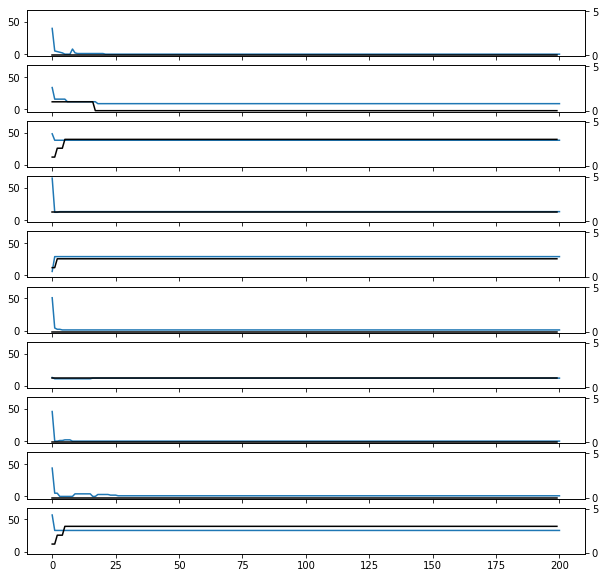

In [419]:
pop = np.array(pop)
hunger = np.array(hunger)
farms = np.array(farms)
fig, ax = plt.subplots(N, 1, figsize=(10,10), sharex=True, sharey=True)
for i in range(N):
    ax[i].plot(pop[:,i])
    twax = ax[i].twinx()
    twax.plot(farms[:,i], 'k')
    twax.set_ylim(-0.1,5.1)

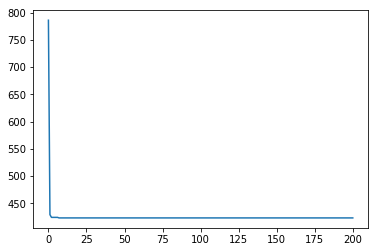

In [414]:
plt.plot(pop.sum(axis=1))

In [389]:
[a.facilities for a in model.schedule.agents]

[{'farm': [<__main__.Farm at 0x150a17404a8>, 1]},
 {'farm': [<__main__.Farm at 0x150a01ca7f0>, 6]},
 {'farm': [<__main__.Farm at 0x150a01ca400>, 1]},
 {'farm': [<__main__.Farm at 0x150a01ca9e8>, 4]},
 {'farm': [<__main__.Farm at 0x150a00ce7b8>, 0]},
 {'farm': [<__main__.Farm at 0x150a00ce2e8>, 1]},
 {'farm': [<__main__.Farm at 0x150a00cefd0>, 0]},
 {'farm': [<__main__.Farm at 0x150a00cef28>, 2]},
 {'farm': [<__main__.Farm at 0x150a1d32588>, 1]},
 {'farm': [<__main__.Farm at 0x150a1d329e8>, 0]}]

In [311]:
with open('../hexgen/export_test.json', 'r') as f:
    params = json.load(f)

display(params['hexes'])
#hexlist = [HexProps(h) for l in params['hexes'] for h in l]
hexlist = [[HexProps(h) for h in l ] for l in params['hexes']]
#hexlist

[[{'id': '81bf8345914b4abba24cbfb2a7a81008',
   'x': 0,
   'y': 0,
   'altitude': 148.0,
   'temperature': -12.24,
   'moisture': 17,
   'biome': {'id': 3,
    'code': 'p',
    'title': 'Alpine Tundra',
    'color': [97, 130, 106],
    'base_fertility': 10,
    'color_satellite': [59, 60, 42],
    'name': 'alpine_tundra'},
   'type': 'land',
   'is_inland': True,
   'is_coast': True,
   'geoform': '90c3b027222641f6b7cb98c3eaae950c',
   'colors': {'satellite': [111, 115, 79],
    'terrain': [223, 190, 144],
    'temperature': [85.0, 255.0, 255.0],
    'biome': [97, 130, 106],
    'rivers': [104, 158, 151]},
   'edges': {'east': {'is_river': False,
     'is_coast': False,
     'direction': 'south'},
    'north_east': {'is_river': False, 'is_coast': False, 'direction': 'south'},
    'north_west': {'is_river': False, 'is_coast': False, 'direction': 'south'},
    'west': {'is_river': False, 'is_coast': False, 'direction': 'south'},
    'south_west': {'is_river': False,
     'is_coast': Fals

In [47]:
for a in model.schedule.agents:
    f = a.facilities['farm'][0]
    print(f.resource_modifier, '\n')

{} 

{} 

{} 

{} 

{} 

{} 

{} 

{} 

{} 

{} 



In [459]:
s = 'farmland'
[s]

['farmland']

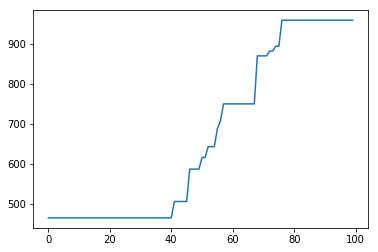

In [361]:
plt.plot(pop)

100


ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

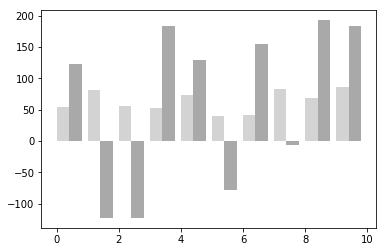

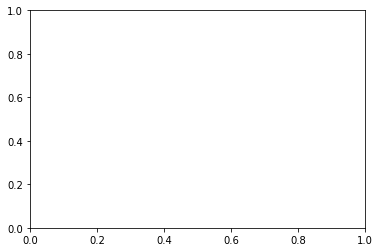

In [334]:
plt.figure()
t = np.arange(NSTEPS)
plt.plot(t, food)
plt.plot(t, np.array(pop)*10, ':k')
plt.plot(t, pop, 'k')
plt.plot(t, farms)
#plt.yscale('log')

(28805.771496326215, 685) 68


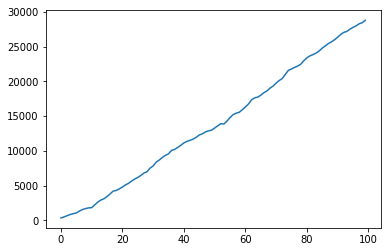

In [244]:
print(model.update_totals(), np.sum(np.array([a.farms for a in model.schedule.agents])))

plt.plot(t, food)
#food[-100:]

Greens None


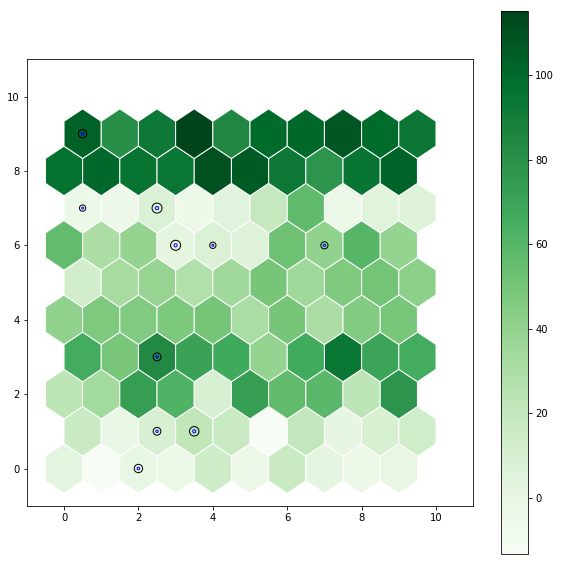

In [245]:
fig = model.grid.plot_prop('farmland', cmap=plt.cm.Greens, edgecolor='w')
ax = fig.get_axes()[0]
fig = model.grid.plot_agent_prop(prop='population', ax=ax)
fig = model.grid.plot_agent_prop(prop='farms', ax=ax, edgecolor='b')
#fig.colorbar()


Greens None


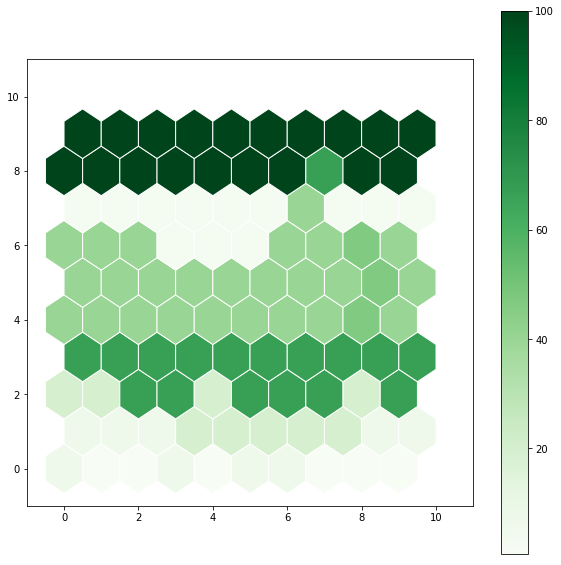

In [389]:
fig = model.grid.plot_prop('biome_base_fertility', cmap=plt.cm.Greens, edgecolor='w')

In [360]:
h = model.grid.grid[]

In [361]:
h = model.grid.grid[0][0]
hp = h.prop

In [362]:
hp.farmland

array([8.45170937])

In [364]:
np.random.randn(1)

array([0.66153956])

In [390]:
model.grid

{'parameters': {'map_type': {'id': 1,
   'title': 'Terran',
   'colors': [[-25, [0, 15, 120]],
    [-15, [0, 20, 130]],
    [0, [0, 20, 170]],
    [20, [56, 89, 22]],
    [50, [75, 112, 9]],
    [75, [129, 135, 42]],
    [100, [196, 150, 95]],
    [110, [223, 190, 144]],
    [120, [233, 200, 154]],
    [135, [243, 210, 164]],
    [140, [253, 220, 174]]],
   'name': 'terran'},
  'surface_pressure': 1013.25,
  'size': 10,
  'year_length': 365,
  'day_length': 24,
  'base_temp': 0,
  'avg_temp': 15,
  'sea_percent': 30,
  'hydrosphere': True,
  'ocean_type': {'id': 1, 'title': 'Water', 'name': 'water'},
  'random_seed': 123456,
  'roughness': 8,
  'height_range': [0, 255],
  'pressure': 1,
  'axial_tilt': 23,
  'craters': False,
  'volanoes': True,
  'num_rivers': 10,
  'num_territories': 0,
  'eport_type': 'png'},
 'details': {'size': 10,
  'sea_level': 44.0,
  'avg_height': 73.85,
  'max_height': 148.0,
  'min_height': 40.0},
 'hexes': [[{'x': 0,
    'y': 0,
    'altitude': 148.0,
    '

In [ ]:
class Community():
    def __init__(self):
        self.population = np.random.randint(5, 100)
        self.food = np.random.randint(0, self.population)
        self.farms = 0
        #self.goods = np.random.randint(0, 1e3)
        #self.buildings = np.random.randint(0, 10)
        #self.trade = np.random.randint(0, 10)
        #self.defense = np.random.randint(0, 10)
        
class Village(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model, properties):
        super().__init__(unique_id, model)
        #self.wealth = 1
        #for k, v in properties.items():
        #    self.__setattr__(k, v)
        #print(properties)
        self.population = np.random.randint(5, 100)
        self.food = np.random.randint(0, self.population)
        self.farms = 0
        self.workers = 0
        
    def get(self, attribute):
        return self.__getattribute__(attribute)
    
    def update(self, attribute, value):
        self.__setattr__(attribute, value)
    
    def assign_workers(self, N, workplace):
        if (self.population-self.workers) >=N:
            #print(self.population, self.get(workplace),end=', ')
            self.workers += N
            self.update(workplace, self.get(workplace)+1)
            #print(self.get(workplace))
            
    def produce(self, resource, building, hex_key, production):
        x, y = self.pos
        #print(x,y)
        mod = self.model.grid.grid[x][y].prop.get(hex_key)/100 
        old_resource = self.get(resource)
        N = self.get(building)*production
        self.update(resource, old_resource+N*mod+ np.random.randn()*N/2)
        
        
    def step(self):
        if self.population == 0:
            return
        self.assign_workers(10, 'farms')
        self.produce('food', 'farms',  'farmland', 10)
        
        if self.food/self.population < 10:
            #print(self.food/self.population)
            try:
                other_agent = self.random.choice(self.model.schedule.agents)
                leave_N = np.random.randint(0, self.population-self.workers+1)
                other_agent.population += leave_N
                self.population -= leave_N
                #print(leave_N)
                #return leave_N
            except ValueError as err:
                print('Error', err, self.food, self.population, self.food/self.population, 
                      self.food%10+1, self.food%10, self.population-self.food/10)

        
        
class Kingdom(Model):
    """A model with some number of agents."""
    def __init__(self, N, hexmap):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        self.grid = FancyHexGrid(N, False, Village, hexmap)
        # Create agents
        for i in range(self.num_agents):
            a = Village(i, self, Community().__dict__)
            self.schedule.add(a)
            self.grid.place_agent(a, self.grid.find_empty())
        #print(self.grid.grid)
    
    def update_totals(self):
        self.totalfood = 0
        self.totalpop = 0
        for a in self.schedule.agents:
            self.totalfood += a.food
            self.totalpop += a.population
        return self.totalfood, self.totalpop
        
    
    def fix_food(self):
        self.update_totals()
        print('total food in kingdom: ', self.totalfood/25, self.totalpop)
        print('Sufficient food in kingdom: ', self.totalfood/25 >= self.totalpop)
        if self.totalfood/25 >= self.totalpop:
            return
        while self.totalfood/25 < self.totalpop:
            a = self.random.choice(self.schedule.agents)
            a.food += np.random.randint(1, (self.totalpop+1)*25-self.totalfood)
            self.update_totals()

        print('After update...')
        print('total food in kingdom: ', self.totalfood/25, self.totalpop)
        print('Sufficient food in kingdom: ', self.totalfood/25 >= self.totalpop)
        
    def get_agent_pos():
        return []
        

    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()
        #migrants = 0
        #print('Step', self.schedule.step())
        #return migrants
        #print(self.update_totals())
        
        